# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + str(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # print(city_url)
   
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el bauga
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | machico
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | imperatriz
Processing Record 8 of Set 1 | zheleznodorozhnyy
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | tuy hoa
Processing Record 12 of Set 1 | lukolela
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | zharkent
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | chazuta
Processing Record 19 of Set 1 | nikolayevsk-on-amure
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | keflavik
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el bauga,18.2620,33.9081,32.96,12,26,6.77,SD,1687905362
1,port-aux-francais,-49.3500,70.2167,2.60,80,93,8.97,TF,1687905135
2,blackmans bay,-43.0167,147.3167,6.07,80,59,4.25,AU,1687905363
3,machico,32.7000,-16.7667,28.40,24,0,6.17,PT,1687905363
4,adamstown,-25.0660,-130.1015,21.06,74,89,12.15,PN,1687905137


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el bauga,18.2620,33.9081,32.96,12,26,6.77,SD,1687905362
1,port-aux-francais,-49.3500,70.2167,2.60,80,93,8.97,TF,1687905135
2,blackmans bay,-43.0167,147.3167,6.07,80,59,4.25,AU,1687905363
3,machico,32.7000,-16.7667,28.40,24,0,6.17,PT,1687905363
4,adamstown,-25.0660,-130.1015,21.06,74,89,12.15,PN,1687905137


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

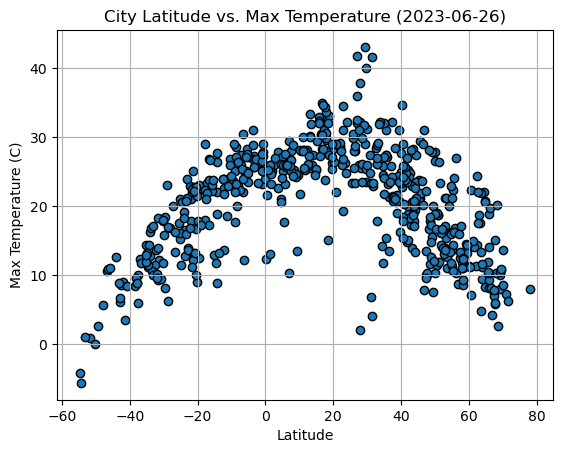

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-06-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

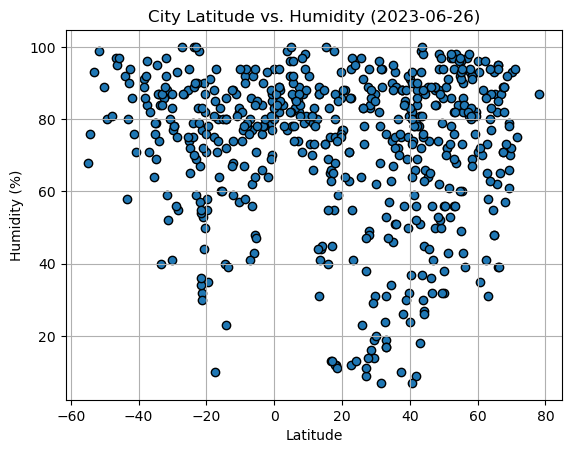

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

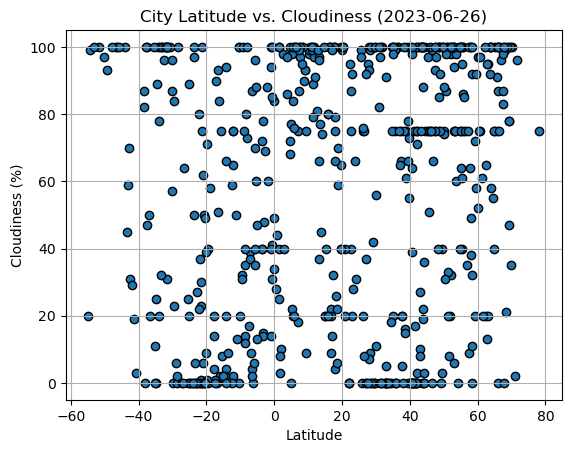

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-06-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

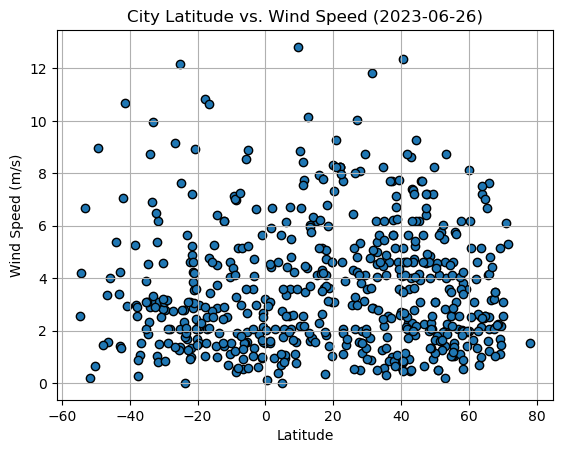

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-06-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def linear(x,y,title,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.legend(fontsize=9)
    plt.show()
    print(f"The r value is: {rvalue}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el bauga,18.2620,33.9081,32.96,12,26,6.77,SD,1687905362
3,machico,32.7000,-16.7667,28.40,24,0,6.17,PT,1687905363
7,zheleznodorozhnyy,55.7503,38.0042,16.23,86,100,1.04,RU,1687905364
8,colonia,50.9333,6.9500,18.66,72,100,0.51,DE,1687905364
10,tuy hoa,13.0833,109.3000,25.48,89,37,1.61,VN,1687905364


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.60,80,93,8.97,TF,1687905135
2,blackmans bay,-43.0167,147.3167,6.07,80,59,4.25,AU,1687905363
4,adamstown,-25.0660,-130.1015,21.06,74,89,12.15,PN,1687905137
5,grytviken,-54.2811,-36.5092,-5.63,76,99,4.21,GS,1687905147
6,imperatriz,-5.5264,-47.4917,27.24,48,70,1.55,BR,1687905249


###  Temperature vs. Latitude Linear Regression Plot

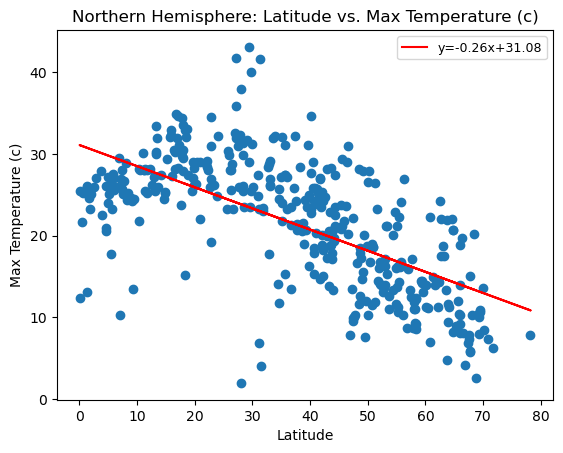

The r value is: -0.648562376858606


In [46]:
# Linear regression on Northern Hemisphere
linear(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
       "Northern Hemisphere: Latitude vs. Max Temperature (c)","Max Temperature (c)")



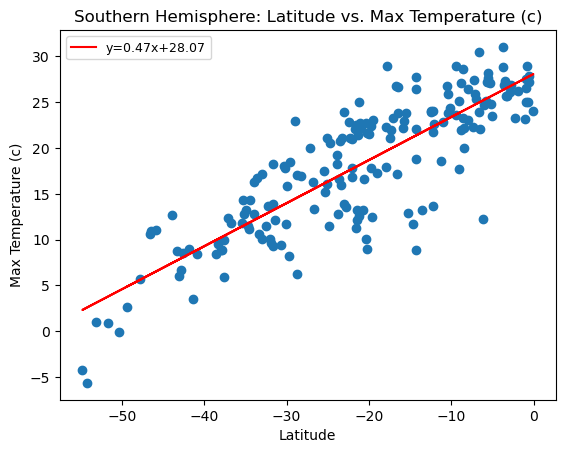

The r value is: 0.8478968836357088


In [47]:
# Linear regression on Southern Hemisphere
linear(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
       "Southern Hemisphere: Latitude vs. Max Temperature (c)","Max Temperature (c)")

**Discussion about the linear relationship:** With both plots, we see that max temperature increases as latitude approaches 0. This makes sense as the equator is the hottest part of Earth. It is safe to say there is a relationship between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

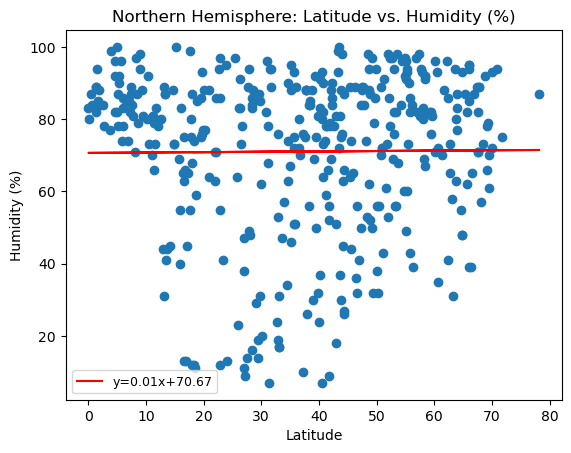

The r value is: 0.008801546542395866


In [48]:
# Northern Hemisphere
linear(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
       "Northern Hemisphere: Latitude vs. Humidity (%)","Humidity (%)")

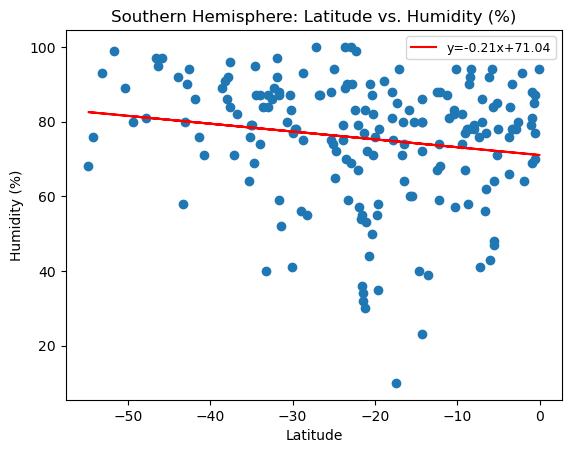

The r value is: -0.168182044871666


In [49]:
# Southern Hemisphere
linear(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
       "Southern Hemisphere: Latitude vs. Humidity (%)","Humidity (%)")

**Discussion about the linear relationship:** From these graphs, it appears as though there is no relationship between latitude and humidity. The best-fit line is too horizontal and the r values are too low.

### Cloudiness vs. Latitude Linear Regression Plot

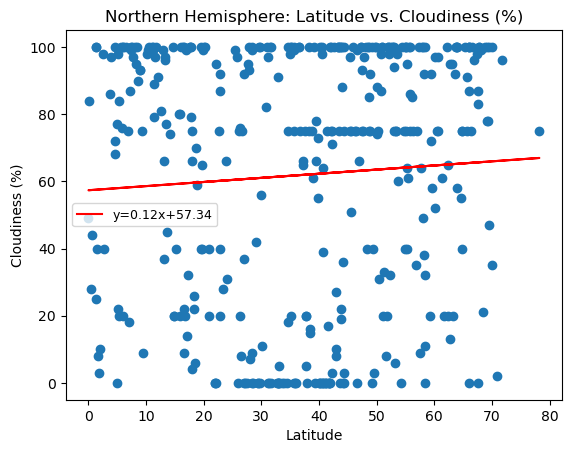

The r value is: 0.06287403383482239


In [50]:
# Northern Hemisphere
linear(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
       "Northern Hemisphere: Latitude vs. Cloudiness (%)","Cloudiness (%)")

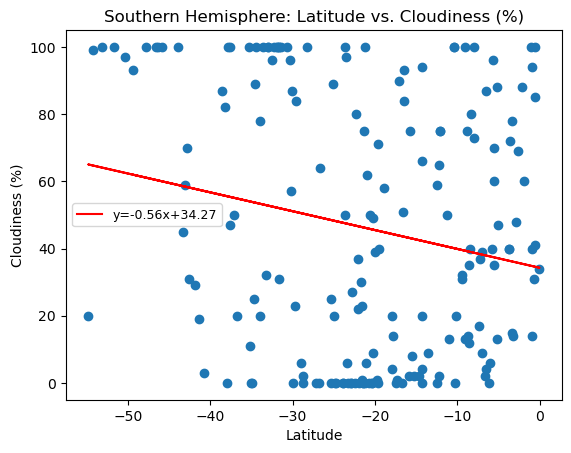

The r value is: -0.19627078157177325


In [52]:
# Southern Hemisphere
linear(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
       "Southern Hemisphere: Latitude vs. Cloudiness (%)","Cloudiness (%)")

**Discussion about the linear relationship:** There is no strong linear relationship shown as the r values are too low.

### Wind Speed vs. Latitude Linear Regression Plot

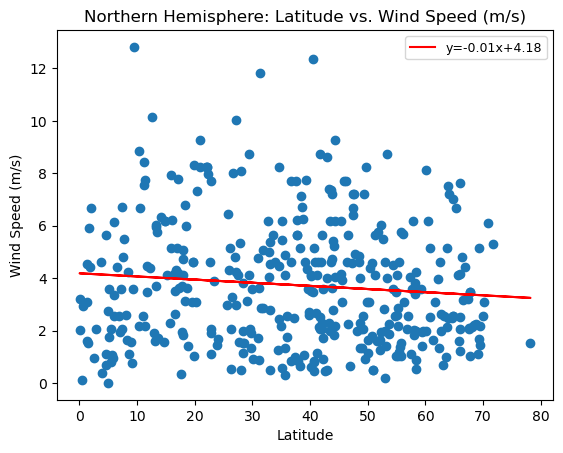

The r value is: -0.09854484134923047


In [53]:
# Northern Hemisphere
linear(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
       "Northern Hemisphere: Latitude vs. Wind Speed (m/s)","Wind Speed (m/s)")

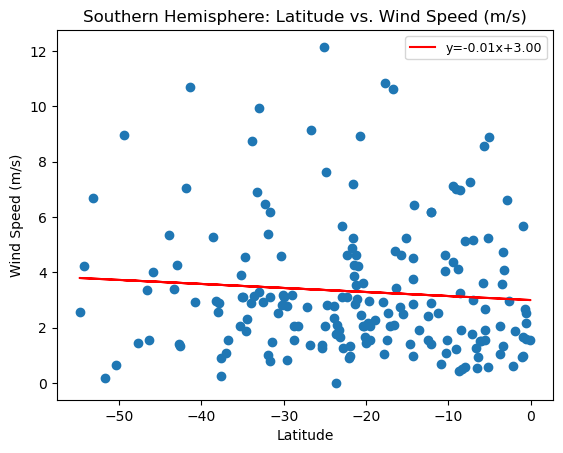

The r value is: -0.08191816803169445


In [54]:
# Southern Hemisphere
linear(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
       "Southern Hemisphere: Latitude vs. Wind Speed (m/s)","Wind Speed (m/s)")

**Discussion about the linear relationship:** It appears that there is no linear relationship between latitude and wind speed either because the two r values are too low.